# Exploratory Data Analysis

The main objectives for this notebook are:
- Perform univariate analysis
- Investigate the relationships between features
- Highlight insights that can inform the stakeholders' decisions
- Go through the next steps that will be used in feature engineering and machine learning

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('../data/Iranian_churn_cleaned.csv')
df

,call_fails,complained,sub_length,charge_amt,seconds_used,usage_freq,sms_freq,unique_contacts_called,tariff_plan,status,cust_value,churn
0,8,False,38,0,4370,71,5,17,Prepaid,Active,197.640,False
1,0,False,39,0,318,5,7,4,Prepaid,Inactive,46.035,False
2,10,False,37,0,2453,60,359,24,Prepaid,Active,1536.520,False
3,10,False,38,0,4198,66,1,35,Prepaid,Active,240.020,False
4,3,False,38,0,2393,58,2,33,Prepaid,Active,145.805,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,False,19,2,6697,147,92,44,Contractual,Active,721.980,False
3146,17,False,17,1,9237,177,80,42,Prepaid,Active,261.210,False
3147,13,False,18,4,3157,51,38,21,Prepaid,Active,280.320,False
3148,7,False,11,2,4695,46,222,12,Prepaid,Active,1077.640,False


Additional variable information:
- call_fails: number of call failures
- complained: bool (0: No complaint, 1: complaint)
- sub_length: total months of subscription
- charge_amt: Ordinal attribute (0: lowest amount, 9: highest amount)
- seconds_used: total seconds of calls
- usage_freq: total number of calls
- sms_freq: total number of text messages
- unique_contacts_called: total number of distinct phone calls
- tariff_plan: categorical (1: Pay as you go, 2: contractual)
- status: categorical (1: active, 2: non-active)
- churn: bool (1: churn, 0: non-churn) - Class label
- cust_value: The calculated value of customer

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   call_fails              3150 non-null   int64  
 1   complained              3150 non-null   bool   
 2   sub_length              3150 non-null   int64  
 3   charge_amt              3150 non-null   int64  
 4   seconds_used            3150 non-null   int64  
 5   usage_freq              3150 non-null   int64  
 6   sms_freq                3150 non-null   int64  
 7   unique_contacts_called  3150 non-null   int64  
 8   tariff_plan             3150 non-null   object 
 9   status                  3150 non-null   object 
 10  cust_value              3150 non-null   float64
 11  churn                   3150 non-null   bool   
dtypes: bool(2), float64(1), int64(7), object(2)
memory usage: 252.4+ KB


In [4]:
df.describe()

,call_fails,sub_length,charge_amt,seconds_used,usage_freq,sms_freq,unique_contacts_called,cust_value
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,470.972916
std,7.263886,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,517.015433
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,113.801250
50%,6.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,228.480000
75%,12.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,788.388750
max,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,2165.280000


# Univariate analysis

In [65]:
sns.set_style("whitegrid")

In [66]:
def draw_mean_median(dataframe, axes, i):
    """
    Function for drawing a mean and median line.
    Arg: df['column']
    """
    axes[(i//3), (i%3)].axvline(x=np.mean(dataframe),
            color='red',
            label='mean')
    axes[(i//3), (i%3)].axvline(x=np.median(dataframe),
            color='green',
            ls='--',
            label='median')
    print(str(i//3), (i%3), '| mean: ', np.mean(dataframe), ' | median:', np.median(dataframe))

0 0 | mean:  7.627936507936508  | median: 6.0
0 1 | mean:  32.54190476190476  | median: 35.0
0 2 | mean:  0.9428571428571428  | median: 0.0
1 0 | mean:  4472.459682539683  | median: 2990.0
1 1 | mean:  69.46063492063492  | median: 54.0
1 2 | mean:  73.17492063492064  | median: 21.0
2 0 | mean:  23.50984126984127  | median: 21.0
2 1 | mean:  470.9729158730159  | median: 228.48


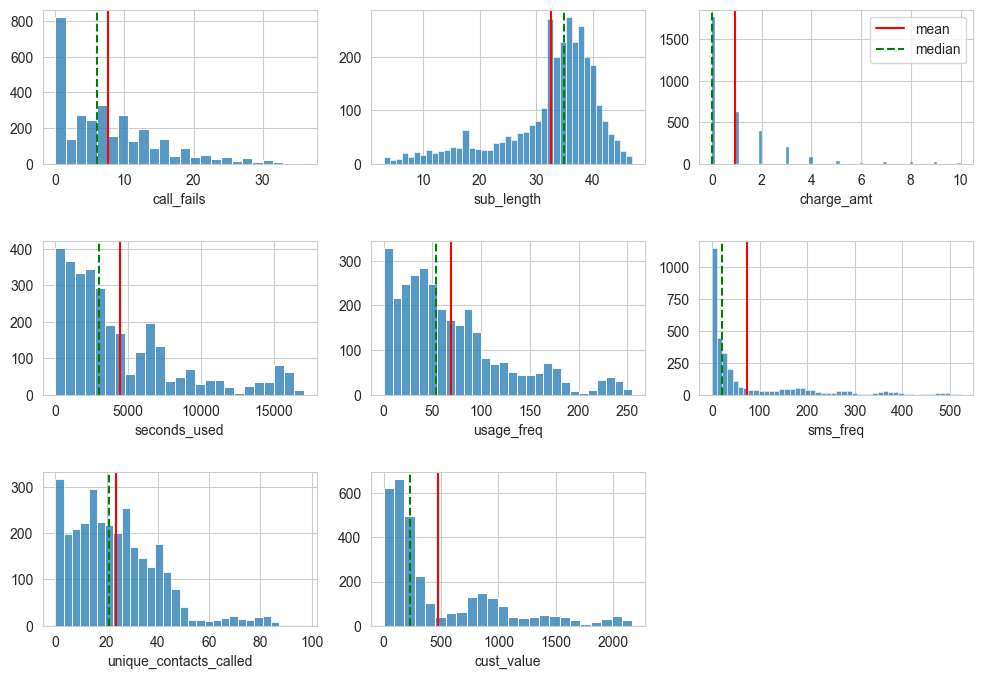

In [67]:
num_list = list(['call_fails', 'sub_length', 'charge_amt', 'seconds_used', 'usage_freq', 'sms_freq', 'unique_contacts_called', 'cust_value'])

fig1, axes = plt.subplots(3, 3, figsize=(12,8))

for i, num_col in enumerate(num_list):
    sns.histplot(x=df[num_col], ax=axes[(i//3), (i%3)])
    draw_mean_median(df[num_col], axes, i)
    axes[(i//3), (i%3)].set_ylabel('')

fig1.delaxes(axes[2,2]) 

fig1.subplots_adjust(wspace=0.2, hspace=0.5)
axes[0,2].legend(loc='upper right')

Since most of the distributions have a skew, I will be referring more to the median as the measure of central tendency, which is less sensitive to skewed distributions and outliers.

**General Observations**
- The distributions for call fails, seconds of use, usage frequency, sms frequency, unique contacts called, and customer value are all positively-skewed. Only the distribution for subscription length has a negative skew. 
- Charge amount is discrete numerical variable.

**Specific Obeservations**
1. The median for number of call failures is 6. 
2. Most of the customers have subscribed to the service for about 35 months.
3. The majority of customers pay for the lower-priced services offered by the company.

4. The median accumulated call time is 2990 seconds, and the median total calls is 54.
5. A half of the users send below 21 messages.

6. A large chunk of the people have called about 21 unique contacts.
7. Majority of the customers have a customer value below 230.

tariff_plan
Contractual    0.077778
Prepaid        0.922222
Name: churn, dtype: float64
status
Active      0.751746
Inactive    0.248254
Name: churn, dtype: float64
churn
False    0.842857
True     0.157143
Name: churn, dtype: float64


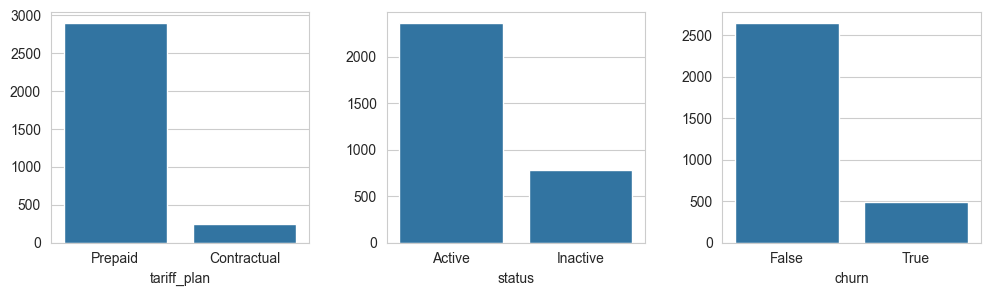

In [68]:
cat_list = list(['tariff_plan', 'status', 'churn'])

fig1, axes = plt.subplots(1, 3, figsize=(12,3))

for i, cat_col in enumerate(cat_list):
    sns.countplot(x=df[cat_col], data=df, ax=axes[i])
    axes[i].set_ylabel('')

    values_count = df.groupby(cat_col)['churn'].count()
    values_frac = values_count / len(df)
    print(values_frac)

fig1.subplots_adjust(wspace=0.3)

**Observations**
- 92% of the customers have prepaid plans.
- About a quarter of the customerbase are inactive, while one-sixth have terminated the company's services.

# Bivariate Analysis

## Numeric Features

For this section, we will look into the KDE of the numerical variables with the highlight on the target variable churn. 

Text(0.5, 0, 'Calls failed')

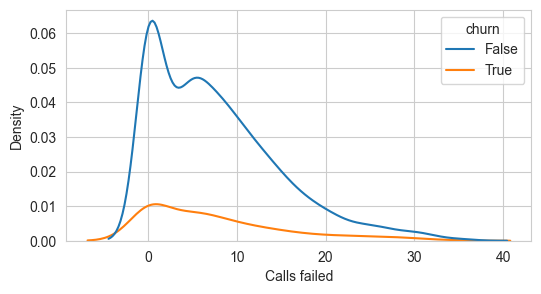

In [83]:
fig, ax = plt.subplots(figsize=(6,3))
sns.kdeplot(x='call_fails', hue='churn', data=df)
plt.xlabel('Calls failed')

Text(0.5, 0, 'Subscription Length (months)')

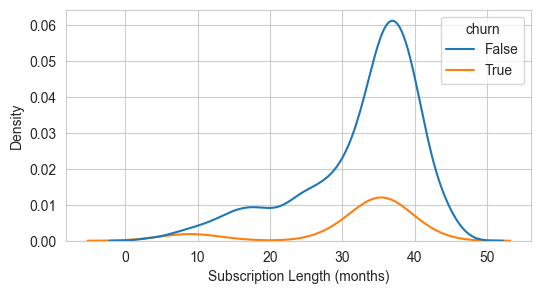

In [87]:
fig, ax = plt.subplots(figsize=(6,3))
sns.kdeplot(x='sub_length', hue='churn', data=df)
plt.xlabel('Subscription Length (months)')

Text(0.5, 0, 'Call time (s)')

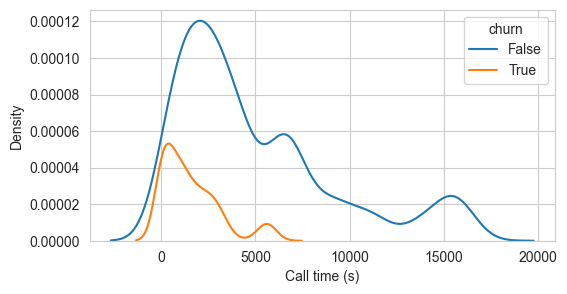

In [88]:
fig, ax = plt.subplots(figsize=(6,3))
sns.kdeplot(x='seconds_used', hue='churn', data=df)
plt.xlabel('Call time (s)')

Text(0.5, 0, 'Calls made')

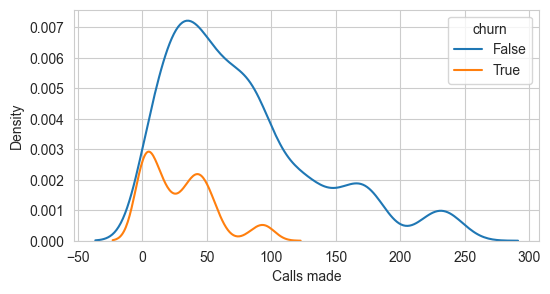

In [89]:
fig, ax = plt.subplots(figsize=(6,3))
sns.kdeplot(x='usage_freq', hue='churn', data=df)
plt.xlabel('Calls made')

Text(0.5, 0, 'SMS sent')

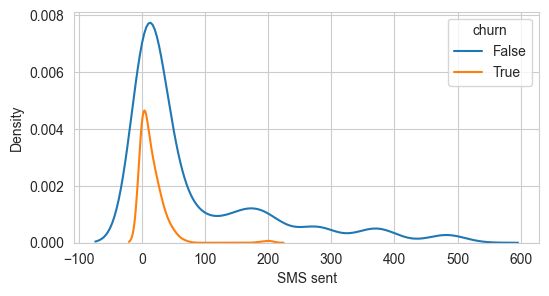

In [95]:
fig, ax = plt.subplots(figsize=(6,3))
sns.kdeplot(x='sms_freq', hue='churn', data=df)
plt.xlabel('SMS sent')

Text(0.5, 0, 'Unique Contacts Called')

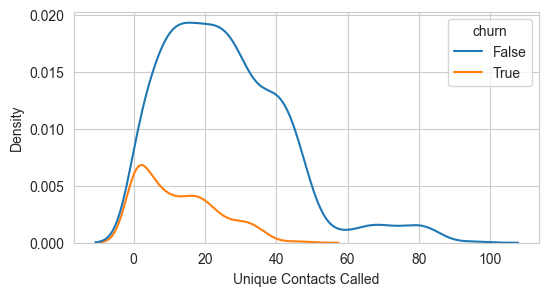

In [96]:
fig, ax = plt.subplots(figsize=(6,3))
sns.kdeplot(x='unique_contacts_called', hue='churn', data=df)
plt.xlabel('Unique Contacts Called')

Text(0.5, 0, 'Computed Customer Value')

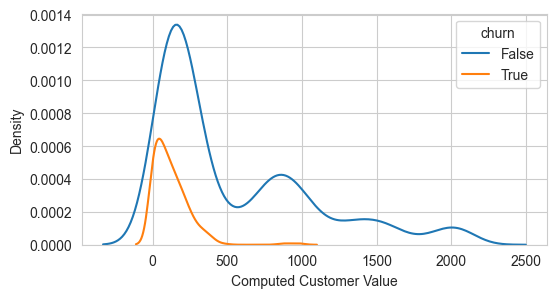

In [97]:
fig, ax = plt.subplots(figsize=(6,3))
sns.kdeplot(x='cust_value', hue='churn', data=df)
plt.xlabel('Computed Customer Value')

<Axes: xlabel='cust_value'>

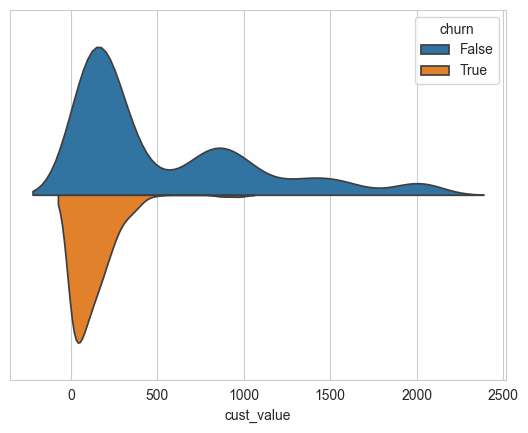

In [64]:

sns.violinplot(data=df, x='cust_value', hue='churn', split = True, inner=None)

In [58]:
# Show vs cust value and vs churn

def two_plot_cont(df, col_name):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize= (16,5))
    sns.scatterplot(data=df, x=col_name, y='cust_value', alpha=0.2, ax=ax0)
    sns.violinplot(data=df, x=col_name, hue='churn', split = True, inner=None)

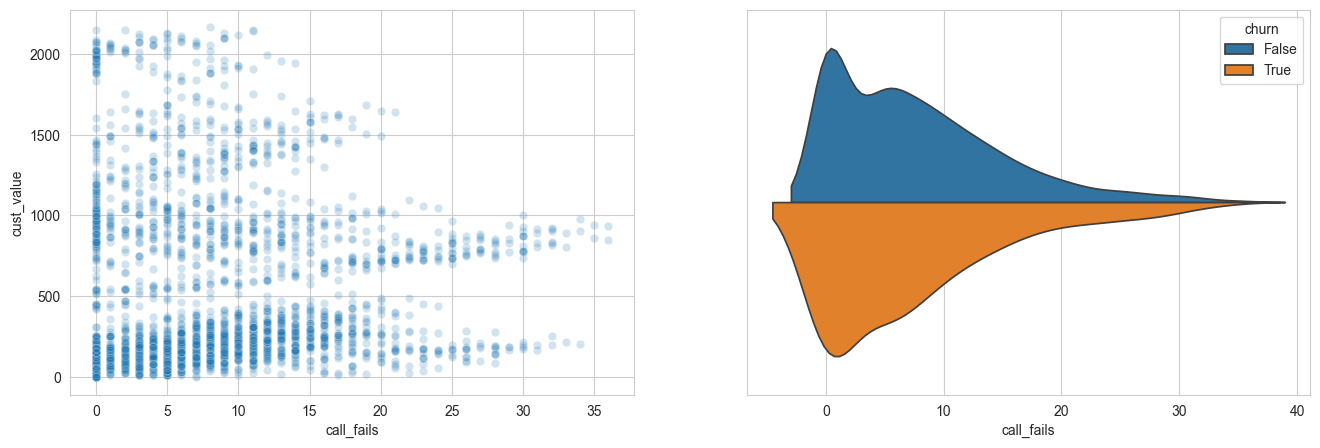

In [59]:
two_plot_cont(df, 'call_fails')

In [60]:
def two_plot_cat(df, col_name):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,5))
    sns.violinplot(data=df, x=col_name, y='cust_value', hue='churn', ax=ax0, split = True, inner=None)
    sns.countplot(x=col_name, hue='churn', data=df)

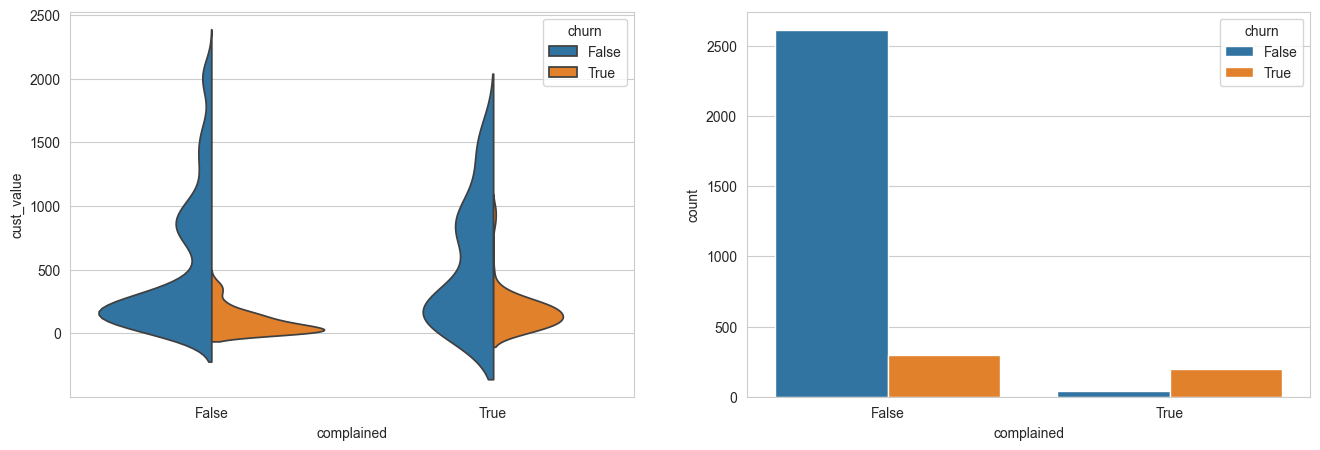

In [61]:
two_plot_cat(df, 'complained')

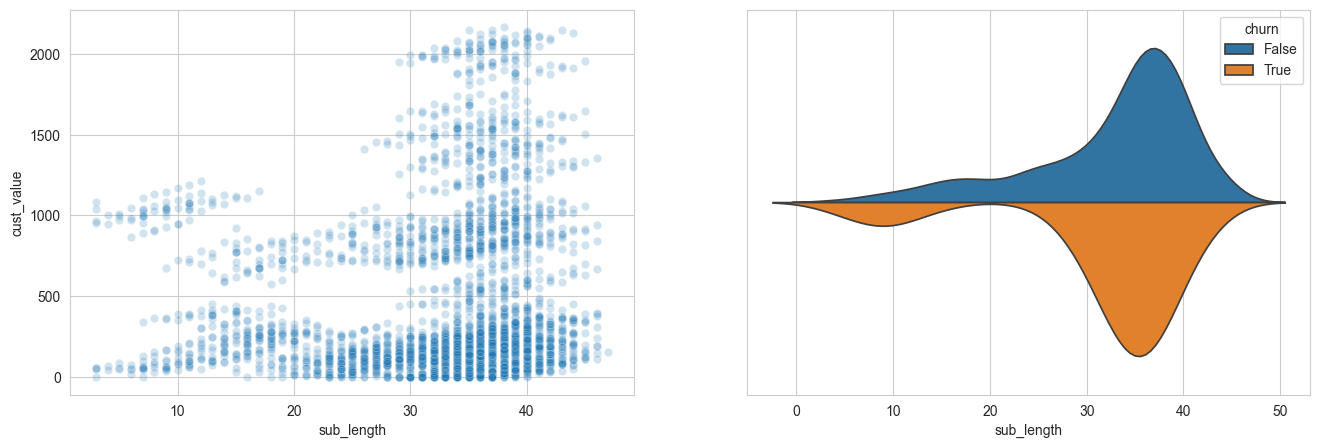

In [62]:
two_plot_cont(df, 'sub_length')

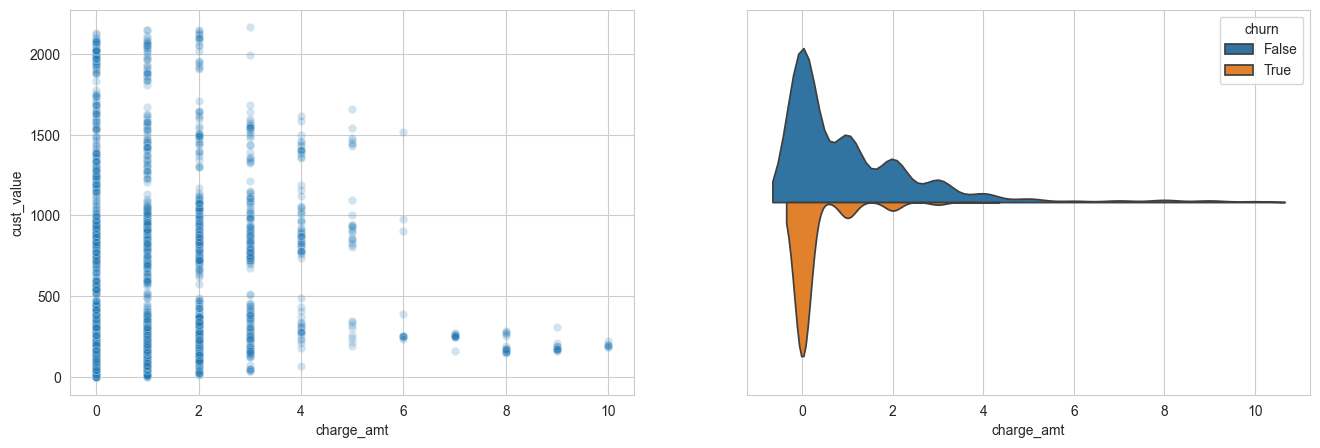

In [63]:
two_plot_cont(df, 'charge_amt')

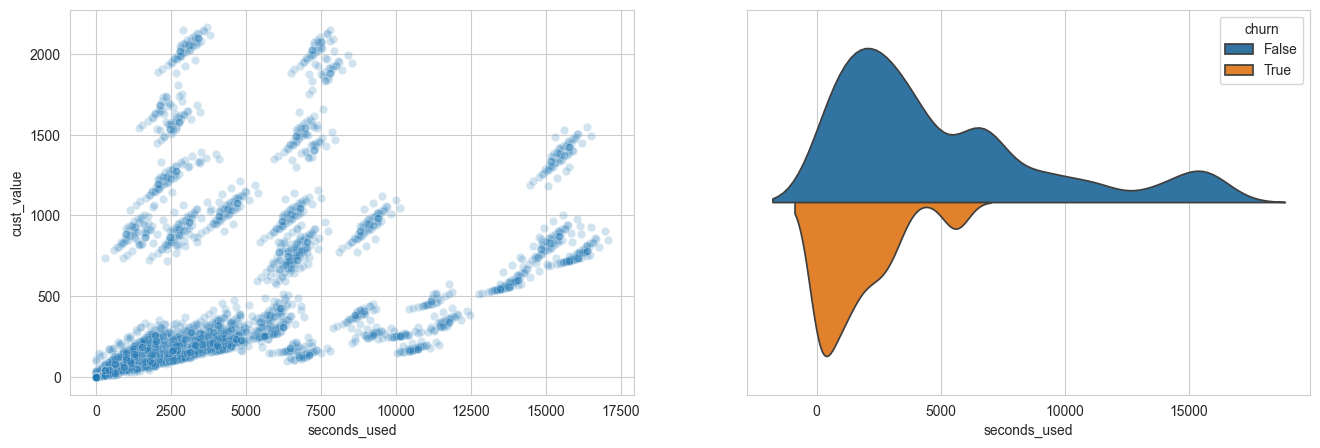

In [90]:
two_plot_cont(df, 'seconds_used')

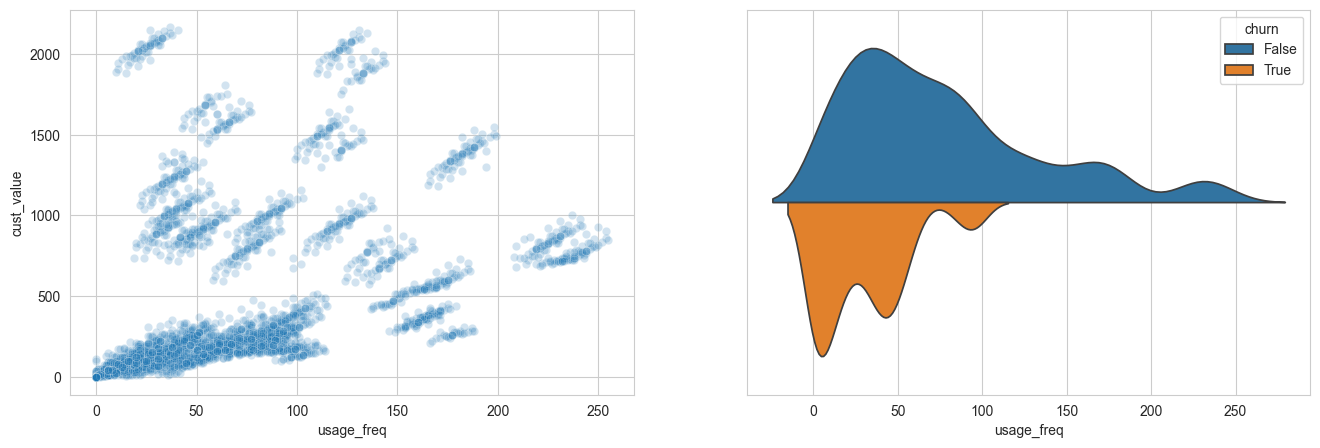

In [91]:
two_plot_cont(df, 'usage_freq')

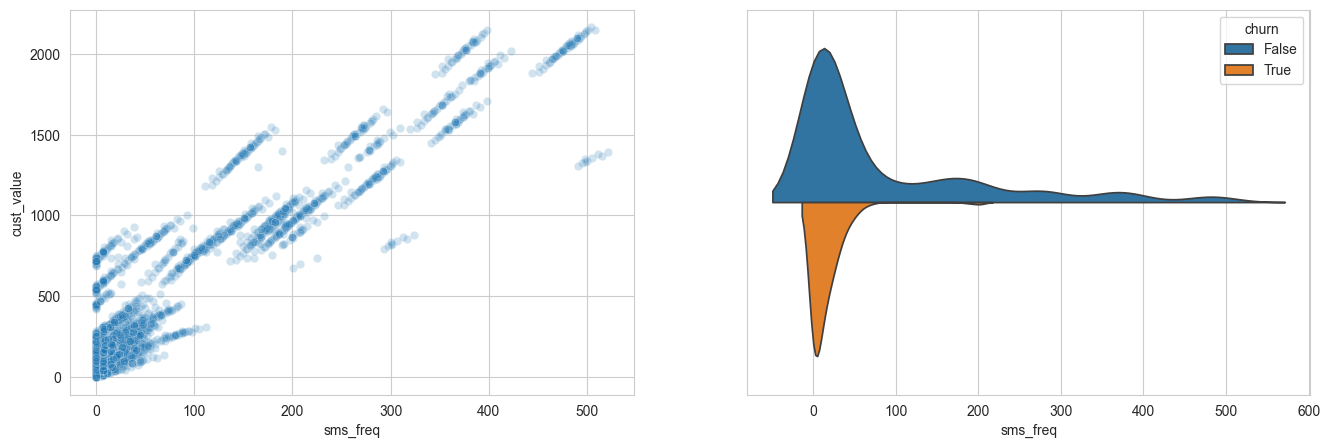

In [92]:
two_plot_cont(df, 'sms_freq')

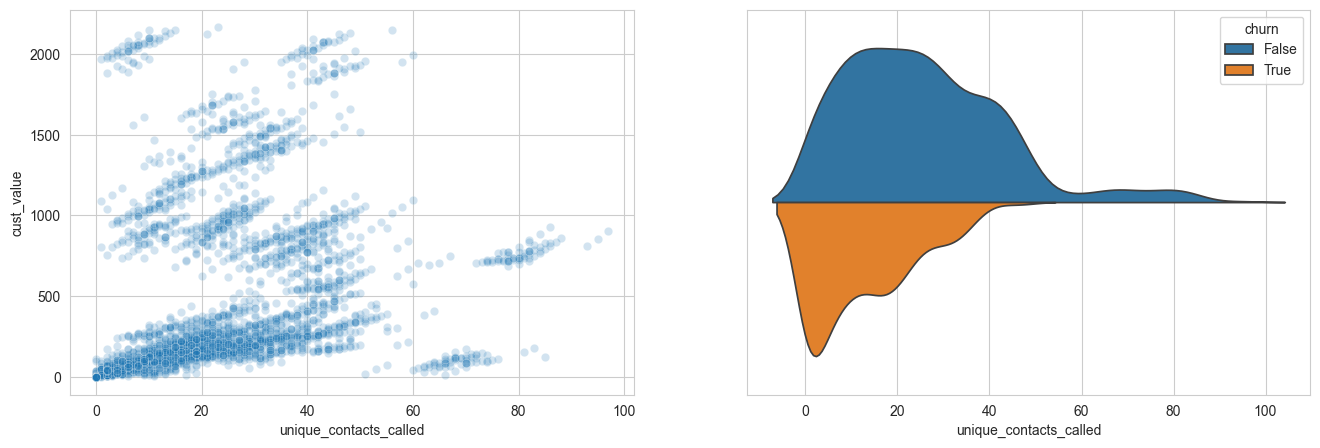

In [93]:
two_plot_cont(df, 'unique_contacts_called')

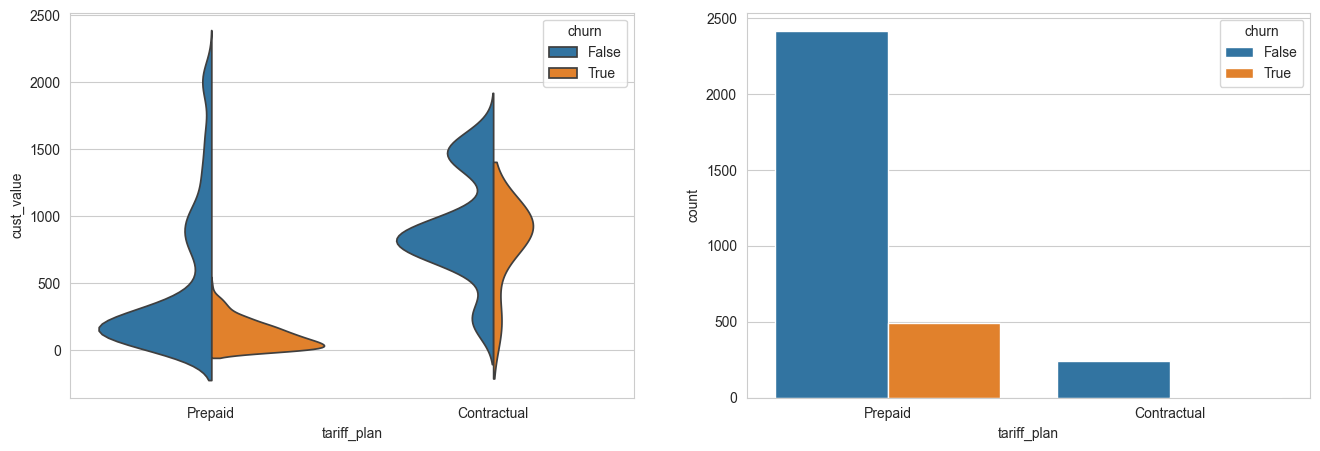

In [94]:
two_plot_cat(df, 'tariff_plan')

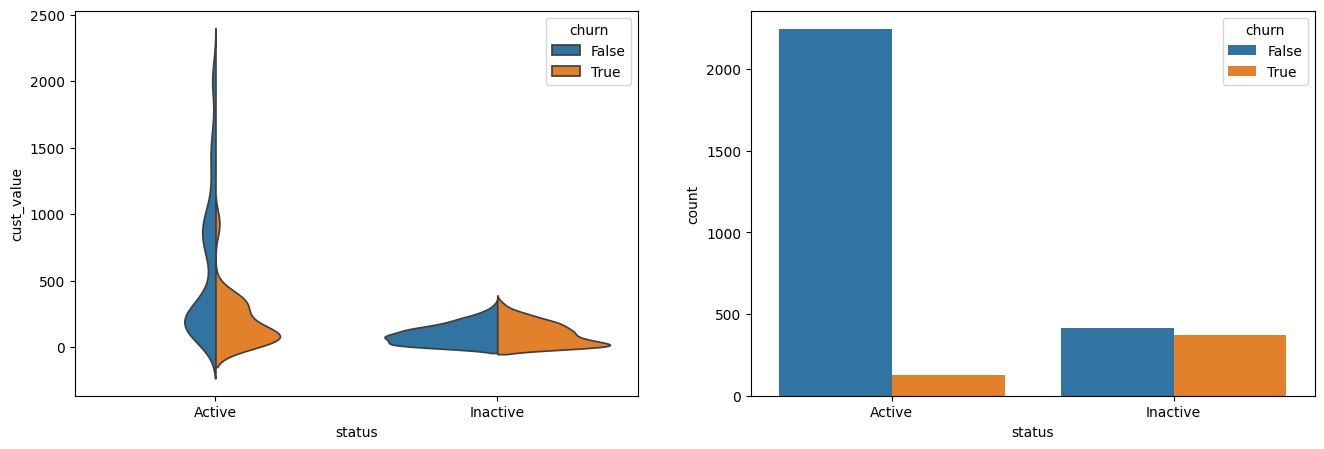

In [198]:
two_plot_cat(df, 'status')

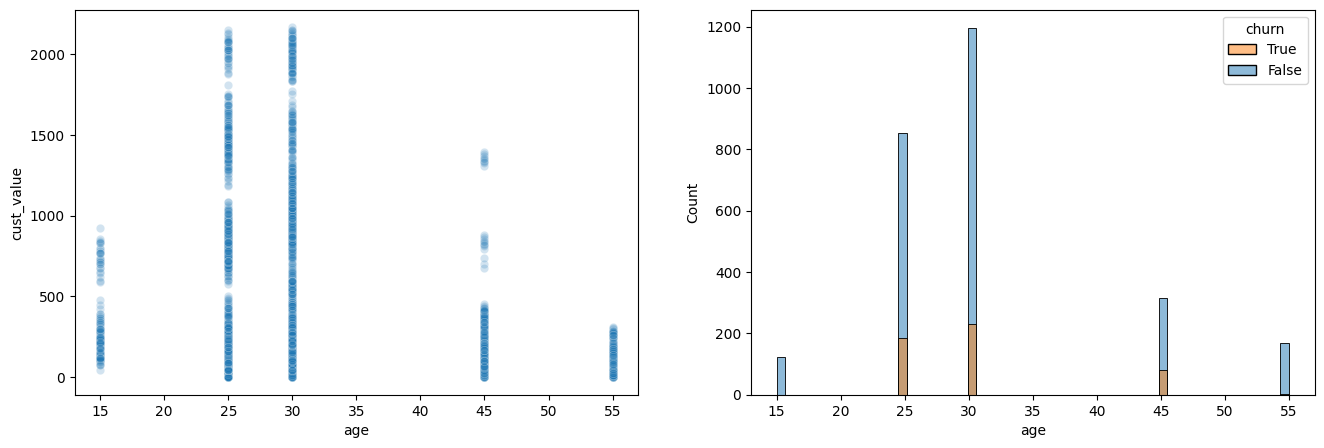

In [171]:
two_plot_cont(df, 'age')

# Multivariate Analysis

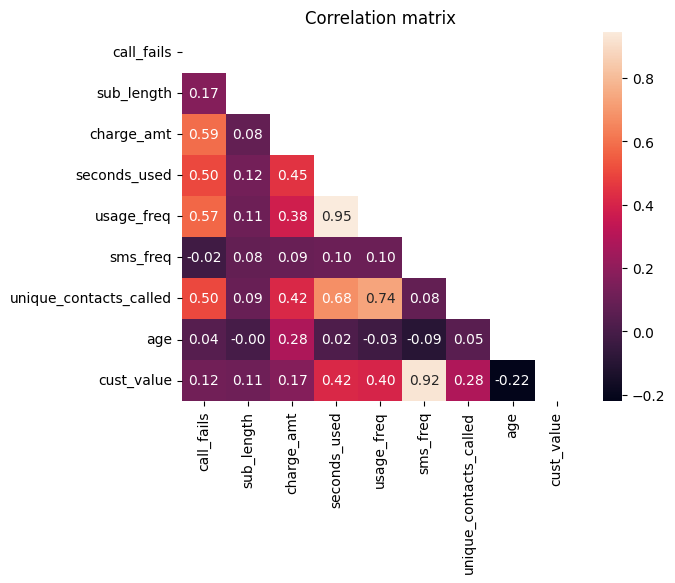

In [199]:
num_list = list(['call_fails', 'sub_length', 'charge_amt', 'seconds_used', 'usage_freq', 'sms_freq', 'unique_contacts_called', 'age', 'cust_value'])
correl_data = df[num_list]
correl_matrix = correl_data.corr()

fig3, ax0 = plt.subplots()  

matrix = np.triu(correl_matrix)

# using the upper triangle matrix as mask 
sns.heatmap(correl_matrix, annot=True, mask=matrix, fmt='.2f',)

plt.title('Correlation matrix')
plt.show()